# San Francisco Salaries

In [1]:
import pandas as pd

### Erstelle aus salaries.csv einen DataFrame

In [2]:
sal = pd.read_csv("./salaries.csv", na_values=['Not Provided'])

C:\Users\fabia\AppData\Local\Temp\ipykernel_14688\1106266540.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal = pd.read_csv("./salaries.csv", na_values=['Not Provided'])


** Empfohlen: `head()` **

In [36]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Wie viele Observations gibt es?

In [37]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148652 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


### Was ist das arithmetische Mittel von `BasePay`?
Lösung: `66325.44884050643`

In [38]:
print(sal['BasePay'].mean())

66325.4488404877


### Was ist der höchste Geldbetrag, der als `OvertimePay` vorhanden ist?
Lösung: `245131.88`

In [7]:
print(sal['OvertimePay'].max())

245131.88


### Welchen Job hat JOSEPH DRISCOLL? (**Nicht** Joseph Driscoll).
Lösung:
```
CAPTAIN, FIRE SUPPRESSION
```

In [11]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

### Was ist das Gesamtgehalt von JOSEPH DRISCOLL?
Lösung:
```
270324.91
```

In [13]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPay'].sum()

np.float64(270324.91)

### Wie lautet der Name der bestverdienensten Person?
Lösung: `NATHANIEL FORD`

In [14]:
sal[sal['TotalPay'] == sal['TotalPay'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

### Wie lautet der Name der am schlechtest bezahlten Person?
Lösung: `Joe Lopez`

In [15]:
sal[sal['TotalPay'] == sal['TotalPay'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

### Ermittle für die Jahre 2012-2014 den arithmetischen Mittelwert des `BasePay`s aller Personen.
Lösung:
```
Year
2012    65436.406857
2013    69630.030216
2014    66564.421924
```


In [21]:
sal['BasePay'] = pd.to_numeric(sal['BasePay'], errors='coerce')

sal[sal['Year'].isin([2012, 2013, 2014])].groupby('Year')['BasePay'].mean()

Year
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

### Wie viele unterschiedliche Jobs gibt es?
Lösung: `2159`

In [22]:
print(sal['JobTitle'].nunique())

2159


### Welche sind die Top 5 häufigsten Jobs und wie viele gibt es davon jeweils?
Lösung:
```
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64
```


In [23]:
print(sal['JobTitle'].value_counts().head(5))

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


### Wie viele Jobs gibt es, die 2013 nur eine Person ausübte?
Lösung: `202`

In [4]:
sal_2013 = sal[sal['Year'] == 2013]
unique_jobs_2013 = sal_2013['JobTitle'].value_counts() == 1
unique_jobs_count_2013 = unique_jobs_2013.sum()
print(unique_jobs_count_2013)

202


### Wie viele Personen haben `'chief'` (caseinsensitive) im Jobnamen?
Lösung: `627`

In [32]:
sal['JobTitle'].str.contains('chief', case=False).sum()

np.int64(627)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'BasePay'}>,
        <Axes: title={'center': 'OvertimePay'}>],
       [<Axes: title={'center': 'OtherPay'}>,
        <Axes: title={'center': 'Benefits'}>,
        <Axes: title={'center': 'TotalPay'}>],
       [<Axes: title={'center': 'TotalPayBenefits'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Notes'}>]], dtype=object)

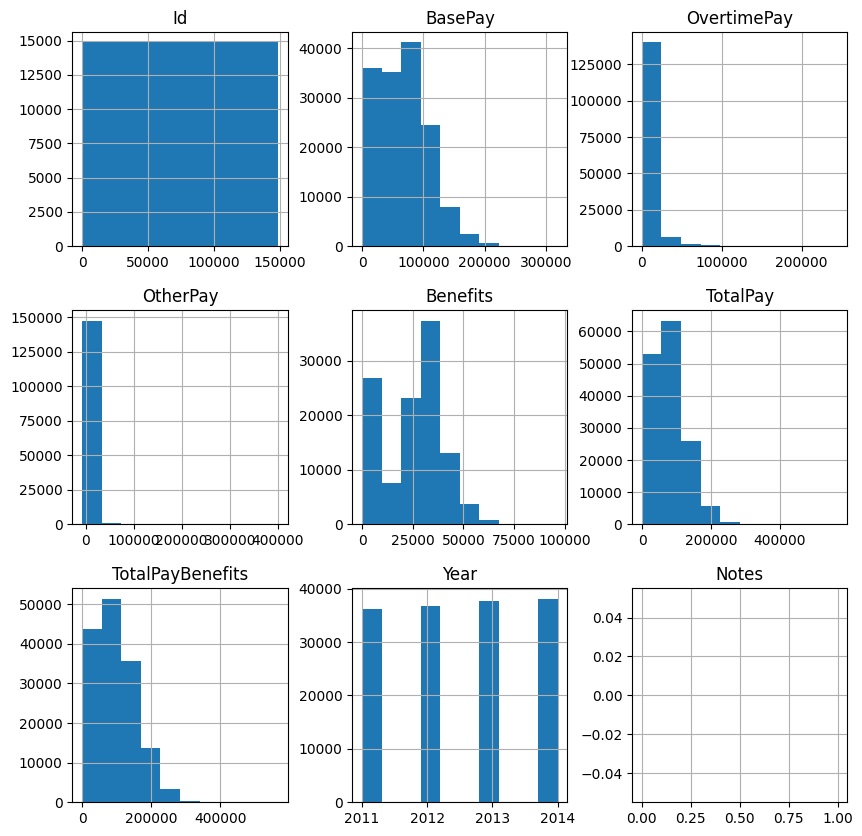

In [35]:
### Erstelle ein Histogramm 
sal.hist(figsize=(10, 10))